<a href="https://colab.research.google.com/github/tanuushree/restaurant-ratings/blob/main/restaurant_ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Dataset.csv")

df.head(10)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [6]:
df.shape

(9551, 21)

In [7]:
#checking for new values

duplicate = df[df.duplicated()]
duplicate.shape

(0, 21)

In [8]:
#checking for null values

df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
#checking data types of features to classify them as numerical and categorical

df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [10]:
column_names = df.columns.tolist()
print(column_names)

['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


In [11]:
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
print(numerical_columns)

['Restaurant ID', 'Country Code', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


In [12]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']


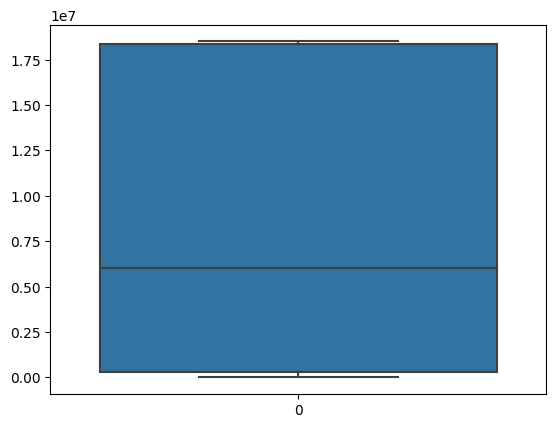

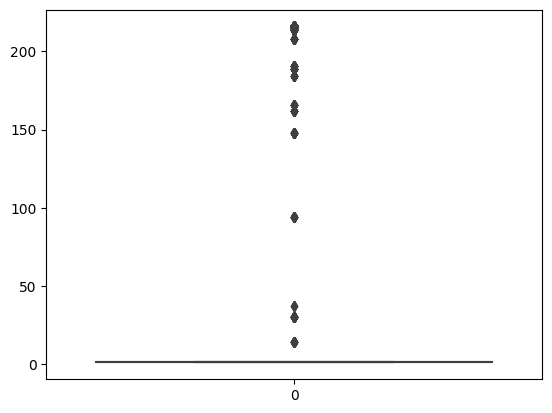

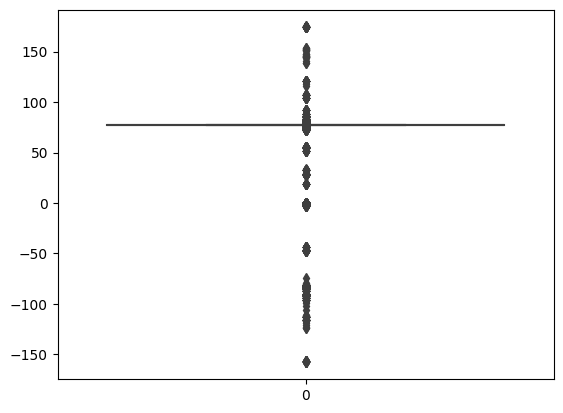

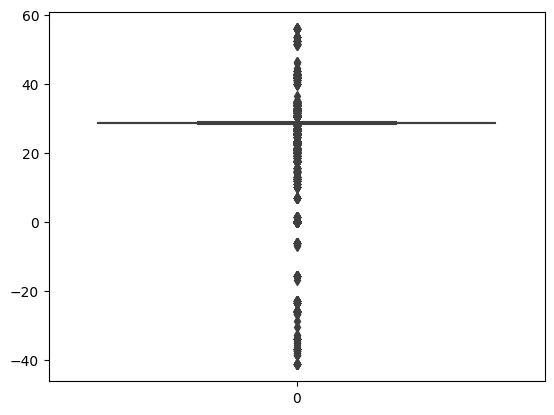

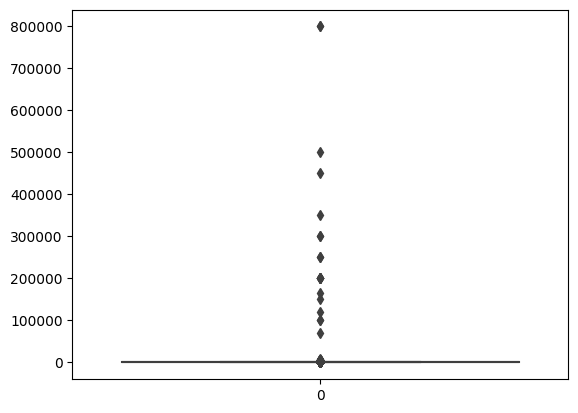

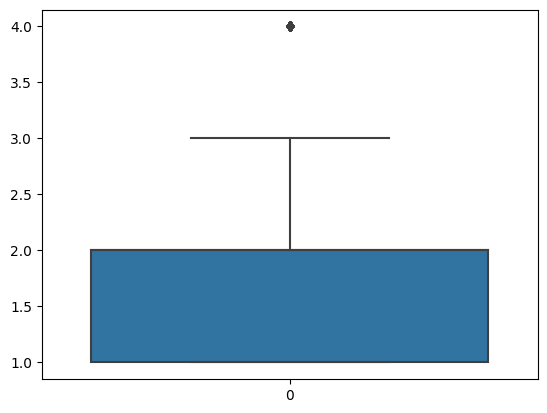

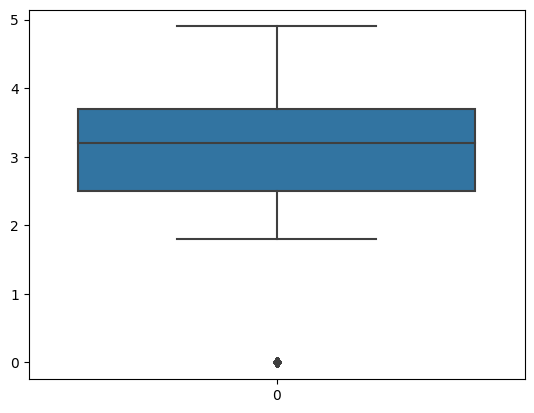

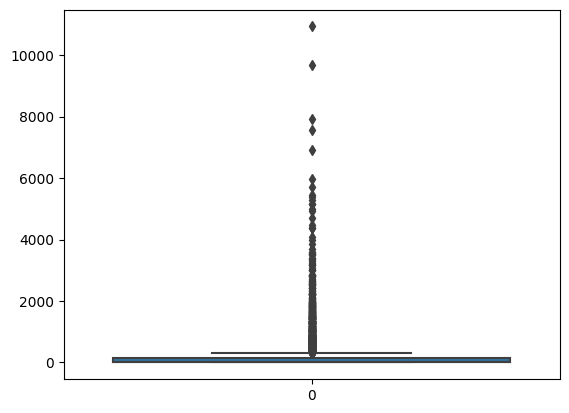

In [13]:
for i in numerical_columns:
  sns.boxplot(df[i])
  plt.show()

In [14]:
def remove_outlier(col):
    sorted(col)
    q1,q3 = col.quantile([0.25,0.75])
    iqr = q3-q1
    lwr_bound = q1 - (1.5*iqr)
    upr_bound = q3 + (1.5*iqr)
    return lwr_bound, upr_bound

Low of Restaurant ID is : -26773531.0
High of Restaurant ID is : 45427785.0


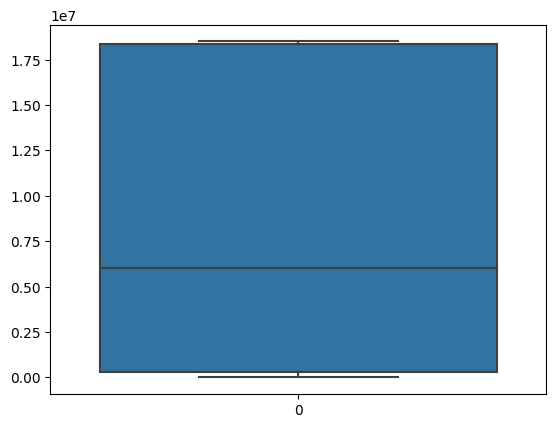

Low of Country Code is : 1.0
High of Country Code is : 1.0


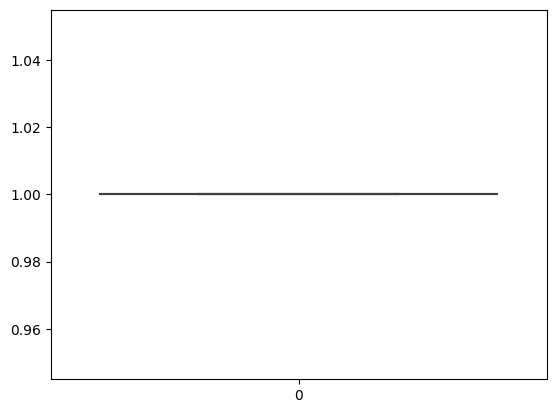

Low of Longitude is : 76.780348175
High of Longitude is : 77.58300117500002


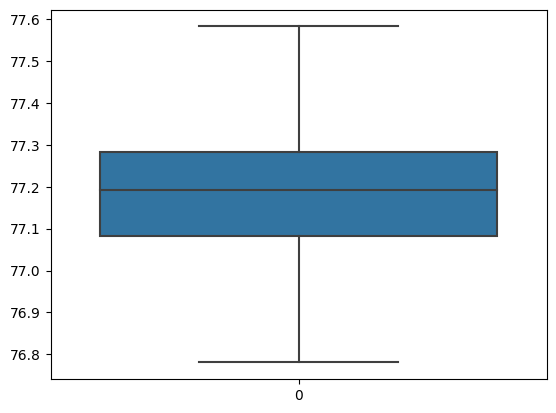

Low of Latitude is : 28.232644200000003
High of Latitude is : 28.888826599999994


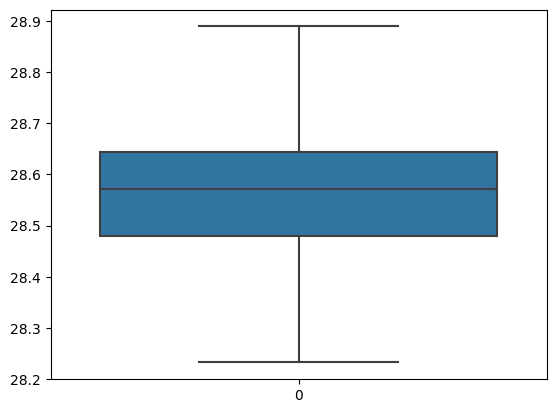

Low of Average Cost for two is : -425.0
High of Average Cost for two is : 1375.0


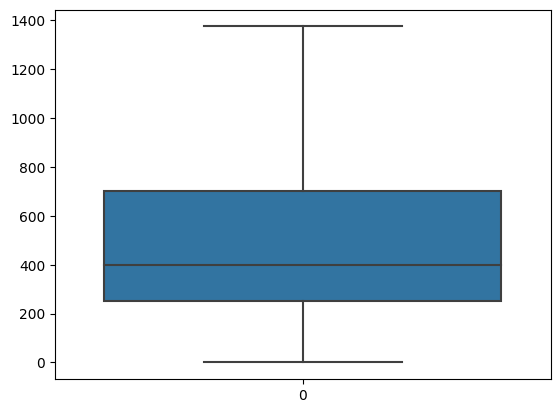

Low of Price range is : -0.5
High of Price range is : 3.5


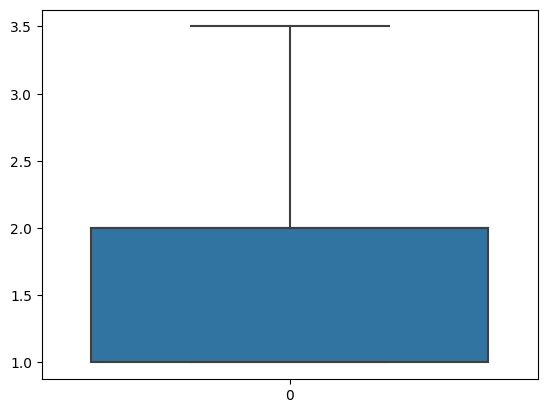

Low of Aggregate rating is : 0.6999999999999997
High of Aggregate rating is : 5.5


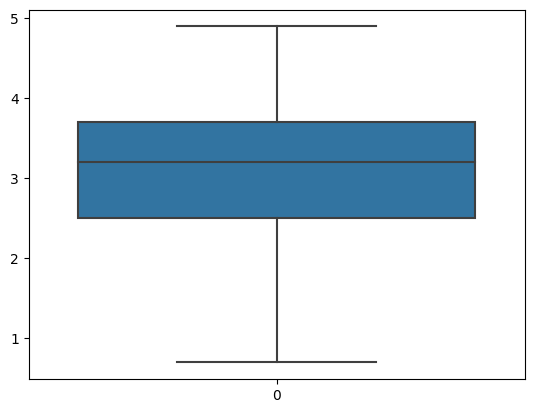

Low of Votes is : -184.0
High of Votes is : 320.0


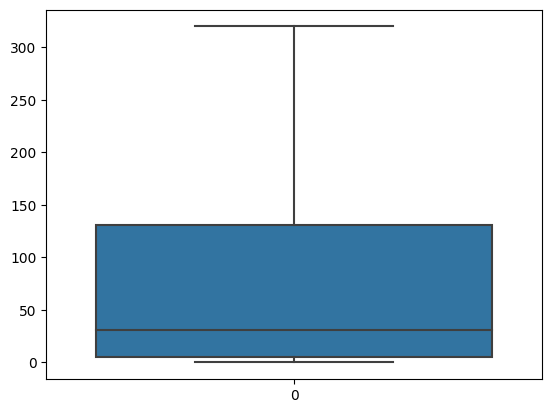

In [15]:
for i in numerical_columns :
    low, high = remove_outlier(df[i])
    print("Low of", i, "is :", low)
    print("High of", i, "is :", high)
    df[i] = np.where(df[i] > high, high, df[i])
    df[i] = np.where(df[i] < low, low, df[i])
    sns.boxplot(df[i])
    plt.show()

In [16]:
df.shape

(9551, 21)

In [17]:
df_encoded = pd.get_dummies(df, columns=categorical_columns)
print(df_encoded.head())

   Restaurant ID  Country Code  Longitude   Latitude  Average Cost for two  \
0      6317637.0           1.0  77.583001  28.232644                1100.0   
1      6304287.0           1.0  77.583001  28.232644                1200.0   
2      6300002.0           1.0  77.583001  28.232644                1375.0   
3      6318506.0           1.0  77.583001  28.232644                1375.0   
4      6314302.0           1.0  77.583001  28.232644                1375.0   

   Price range  Aggregate rating  Votes  Restaurant Name_#45  \
0          3.0               4.8  314.0                    0   
1          3.0               4.5  320.0                    0   
2          3.5               4.4  270.0                    0   
3          3.5               4.9  320.0                    0   
4          3.5               4.8  229.0                    0   

   Restaurant Name_#Dilliwaala6  ...  Rating color_Orange  Rating color_Red  \
0                             0  ...                    0          

<ipython-input-18-8e6677080524>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[column_names].corr()


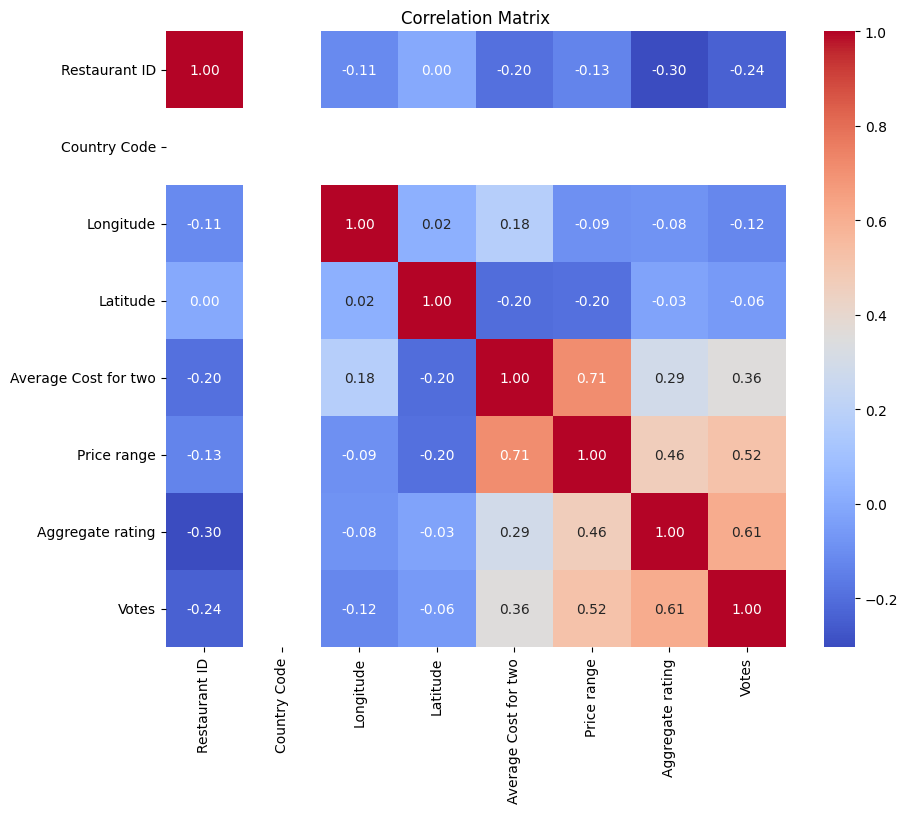

In [18]:
correlation_matrix = df[column_names].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

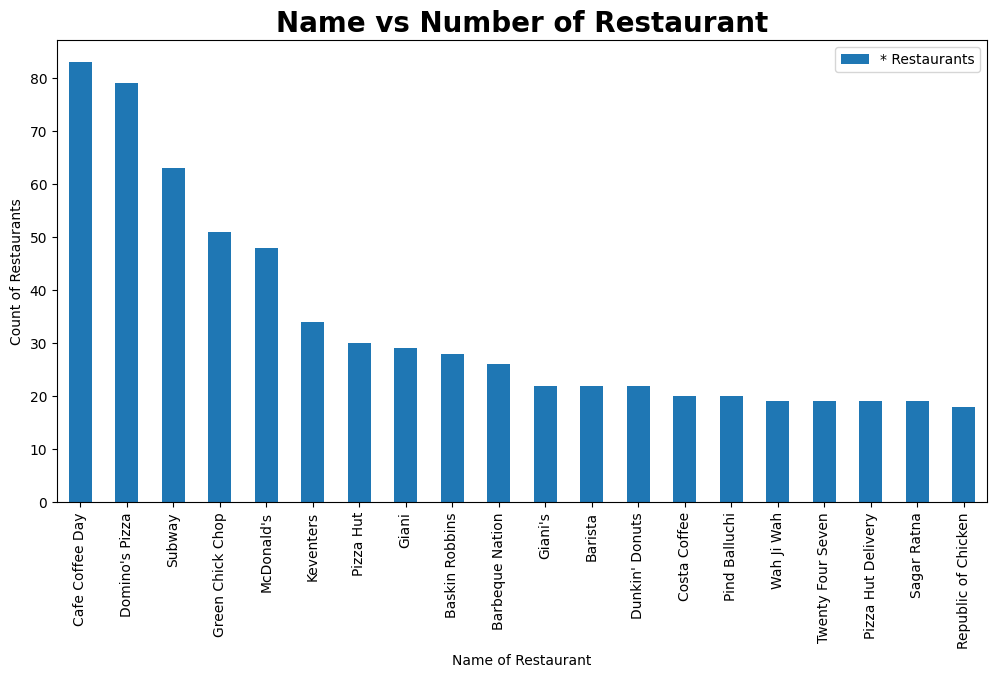

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
ax = df['Restaurant Name'].value_counts()[:20].plot(kind='bar')
ax.legend(['* Restaurants'])
plt.xlabel("Name of Restaurant")
plt.ylabel("Count of Restaurants")
plt.title("Name vs Number of Restaurant", fontsize=20, weight='bold')

plt.show()


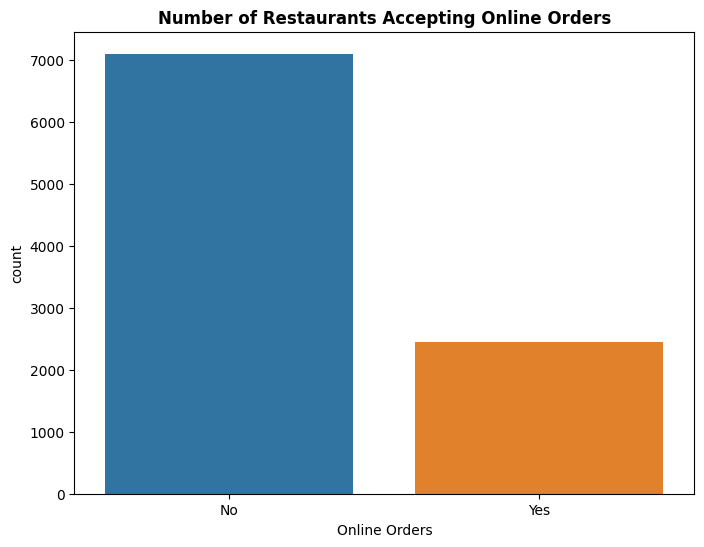

In [21]:
plt.figure(figsize=(8, 6))
vax = sns.countplot(data=df, x='Has Online delivery')
plt.title('Number of Restaurants Accepting Online Orders', weight='bold')
plt.xlabel('Online Orders')

plt.show()

In [22]:
df['Has Table booking'].value_counts()

No     8393
Yes    1158
Name: Has Table booking, dtype: int64

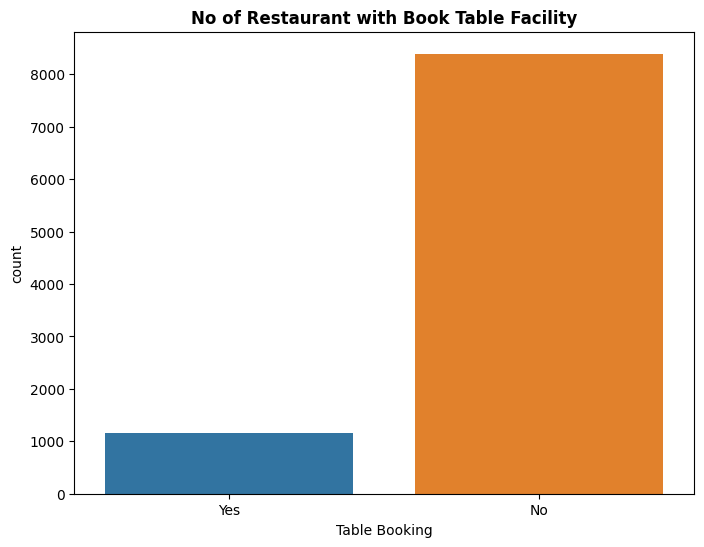

In [23]:
plt.figure(figsize=(8, 6))
vax = sns.countplot(data=df, x='Has Table booking')
plt.title('No of Restaurant with Book Table Facility', weight='bold')
plt.xlabel('Table Booking')

plt.show()

In [24]:
df['Locality'].value_counts()[:10]

Connaught Place        122
Rajouri Garden          99
Shahdara                87
Defence Colony          86
Malviya Nagar           85
Pitampura               85
Mayur Vihar Phase 1     84
Rajinder Nagar          81
Safdarjung              80
Satyaniketan            79
Name: Locality, dtype: int64

Text(0.5, 1.0, 'Location')

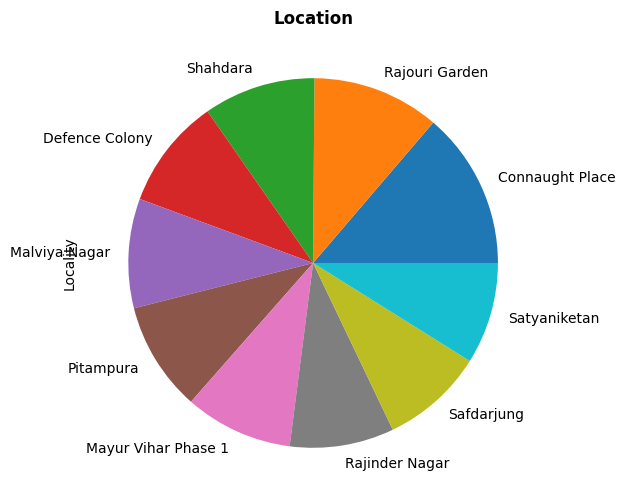

In [25]:
plt.figure(figsize=(12,6))
df['Locality'].value_counts()[:10].plot(kind = 'pie')
plt.title('Location', weight = 'bold')

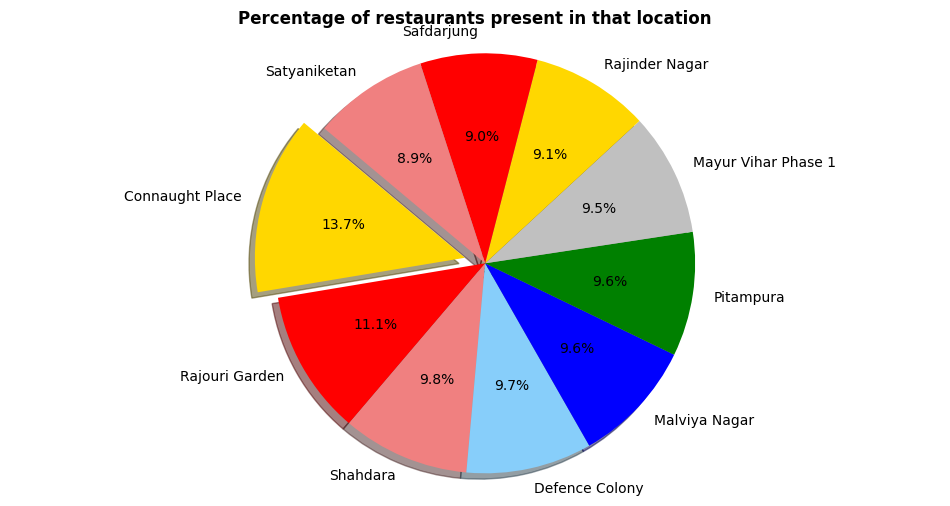

In [26]:
plt.figure(figsize = (12,6))
names = df['Locality'].value_counts()[:10].index
values = df['Locality'].value_counts()[:10].values
colors = ['gold', 'red', 'lightcoral', 'lightskyblue','blue','green','silver']
explode = (0.1, 0, 0, 0,0,0,0,0,0,0)  # explode 1st slice

plt.pie(values, explode=explode, labels=names, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of restaurants present in that location", weight = 'bold')
plt.show()

Text(0.5, 1.0, 'Location vs Count')

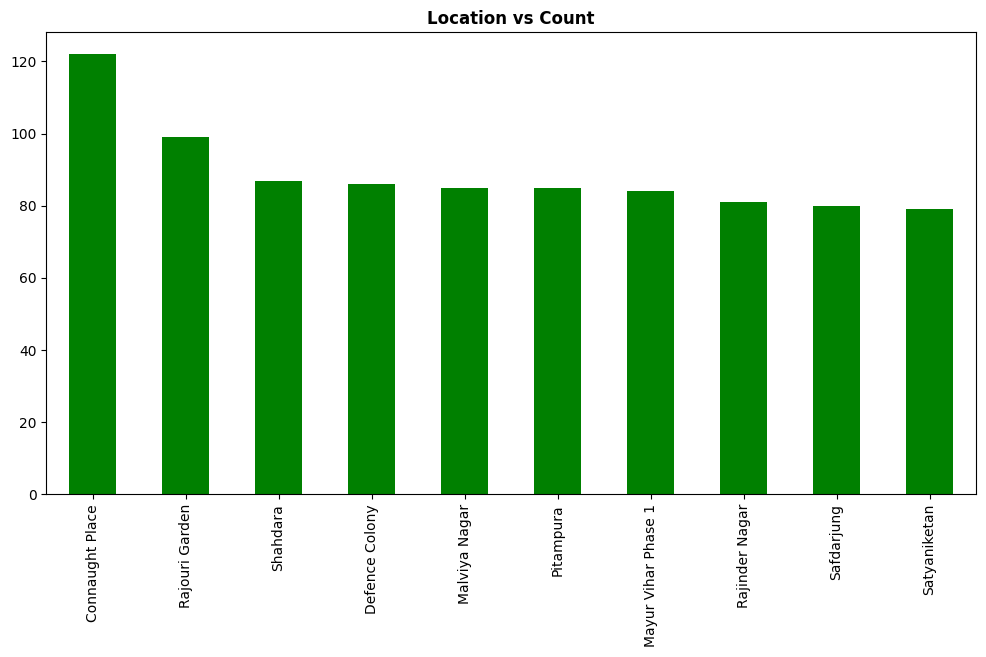

In [27]:
plt.figure(figsize = (12,6))
df['Locality'].value_counts()[:10].plot(kind = 'bar', color = 'g')
plt.title("Location vs Count", weight = 'bold')

In [28]:
df['Average Cost for two'].value_counts()[:10]

500.0     900
300.0     897
400.0     857
1375.0    853
200.0     687
600.0     652
250.0     461
350.0     457
700.0     403
150.0     367
100.0     353
800.0     347
450.0     335
1000.0    281
550.0     183
650.0     177
25.0      174
1200.0    145
10.0      128
Name: Average Cost for two, dtype: int64

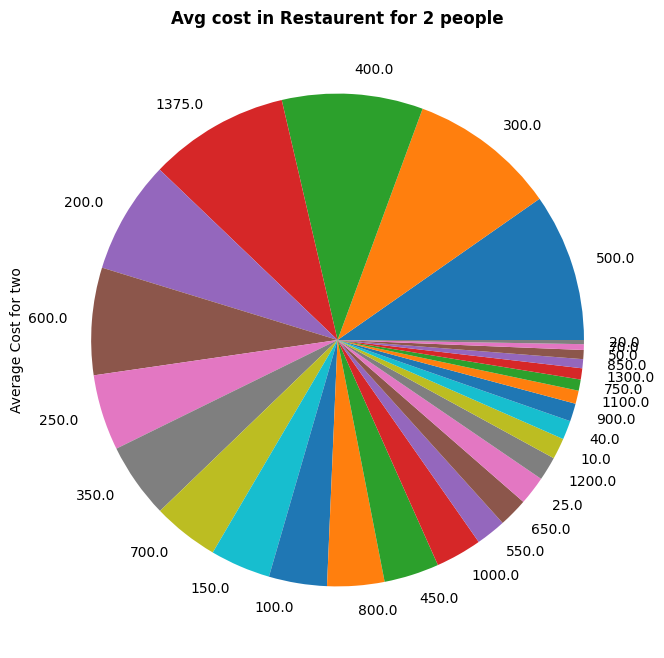

In [29]:
plt.figure(figsize = (12,8))
df['Average Cost for two'].value_counts()[:20].plot(kind = 'pie')
plt.title('Avg cost in Restaurent for 2 people', weight = 'bold')
plt.show()

In [30]:
df['Is delivering now'].value_counts()

No     9517
Yes      34
Name: Is delivering now, dtype: int64

In [31]:
df['Switch to order menu'].value_counts()

No    9551
Name: Switch to order menu, dtype: int64

In [32]:
df['Aggregate rating'] = df.loc[:,'Aggregate rating'].replace('[ ]','',regex = True)
df['Aggregate rating'] = df['Aggregate rating'].astype(str)
df['Aggregate rating'] = df['Aggregate rating'].apply(lambda r: r.replace('/5',''))
df['Aggregate rating'] = df['Aggregate rating'].apply(lambda r: float(r))

2.8237985551251175


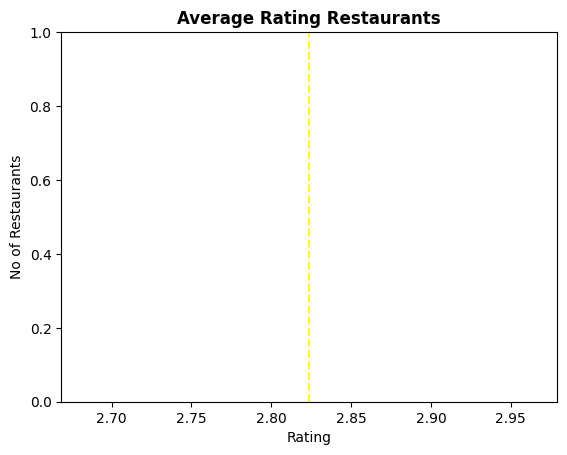

In [33]:
plt.axvline(x= df['Aggregate rating'].mean(),ls='--',color='yellow')
plt.title('Average Rating Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(df['Aggregate rating'].mean())

In [34]:
cuisines_data = df[df['Cuisines'].notnull()]
cuisines_data['Cuisines'] = cuisines_data['Cuisines'].apply(lambda x: x.lower().strip())

<ipython-input-34-e6625ff0705f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cuisines_data['Cuisines'] = cuisines_data['Cuisines'].apply(lambda x: x.lower().strip())


In [35]:
cuisines_count= []

for i in cuisines_data['Cuisines']:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0, 0.5, 'No of restaurants')

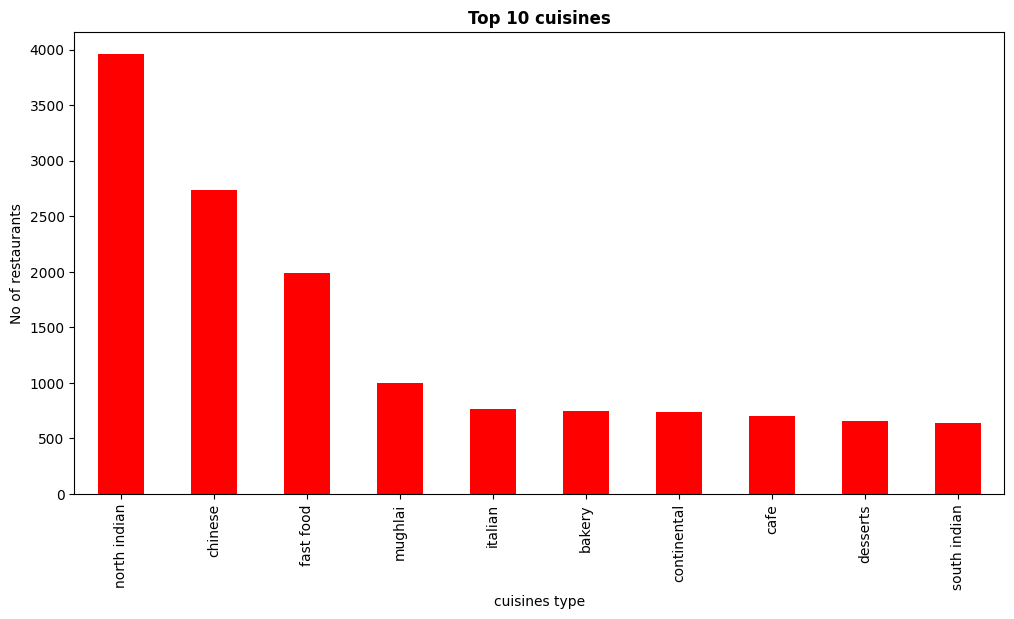

In [36]:
plt.figure(figsize=(12,6))
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines',weight='bold')
plt.xlabel('cuisines type')
plt.ylabel('No of restaurants')